# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes. Why are we grouping the cities in sets of 50?
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params= {'q':city,'appid':weather_api_key,'units':'metric'}
    city_url = url
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url, params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # To limit the number of cities for testing purposes. What does this have to do with grouping? Why are we doing this?
    #if i > 10:
        #break

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yeraliyev
Processing Record 2 of Set 1 | shingu
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | jinka
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | djenne
Processing Record 9 of Set 1 | doba
Processing Record 10 of Set 1 | papao
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | alotau
City not found. Skipping...
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | lisala
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | espanola
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 

Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | ha tinh
Processing Record 43 of Set 4 | usol'ye
Processing Record 44 of Set 4 | kristiansund
Processing Record 45 of Set 4 | akonolinga
Processing Record 46 of Set 4 | callao
Processing Record 47 of Set 4 | loukhi
Processing Record 48 of Set 4 | liaocheng
Processing Record 49 of Set 4 | st. john's
Processing Record 0 of Set 5 | abraham's bay
City not found. Skipping...
Processing Record 1 of Set 5 | safi
Processing Record 2 of Set 5 | ar rutbah
Processing Record 3 of Set 5 | edson
Processing Record 4 of Set 5 | vilyuchinsk
Processing Record 5 of Set 5 | ponta delgada
Processing Record 6 of Set 5 | usogorsk
Processing Record 7 of Set 5 | espargos
City not found. Skipping...
Processing Record 8 of Set 5 | cudillero
Processing Record 9 of Set 5 | ancud
Processing Record 10 of Set 5 | chimoio
Processing Record 11 of Set 5 | bel ombre
Processing Record 12 of Set 5 | ghadamis
Processing Record 13 of Set 5 | orosei
Pro

Processing Record 32 of Set 8 | camaqua
Processing Record 33 of Set 8 | atafu village
Processing Record 34 of Set 8 | rio grande
Processing Record 35 of Set 8 | tevragh zeina
City not found. Skipping...
Processing Record 36 of Set 8 | boyolangu
Processing Record 37 of Set 8 | quezon
Processing Record 38 of Set 8 | al mayadin
Processing Record 39 of Set 8 | nizhneangarsk
Processing Record 40 of Set 8 | waingapu
Processing Record 41 of Set 8 | gulf shores
Processing Record 42 of Set 8 | san ignacio rio muerto
Processing Record 43 of Set 8 | tazacorte
Processing Record 44 of Set 8 | ixtapa
Processing Record 45 of Set 8 | karosta
City not found. Skipping...
Processing Record 46 of Set 8 | vastervik
City not found. Skipping...
Processing Record 47 of Set 8 | nar'yan-mar
Processing Record 48 of Set 8 | katsuura
Processing Record 49 of Set 8 | santa maria
Processing Record 0 of Set 9 | emerald
Processing Record 1 of Set 9 | lagawe
Processing Record 2 of Set 9 | san matias
Processing Record 3 

Processing Record 19 of Set 12 | jacmel
Processing Record 20 of Set 12 | yamba
Processing Record 21 of Set 12 | batu pahat
Processing Record 22 of Set 12 | samarra'
City not found. Skipping...
Processing Record 23 of Set 12 | newman
Processing Record 24 of Set 12 | sarmiento
Processing Record 25 of Set 12 | saint-joseph
Processing Record 26 of Set 12 | santana
Processing Record 27 of Set 12 | new plymouth
Processing Record 28 of Set 12 | east ballina
Processing Record 29 of Set 12 | sur
Processing Record 30 of Set 12 | fuyu
Processing Record 31 of Set 12 | marsh harbour
Processing Record 32 of Set 12 | pizarro
Processing Record 33 of Set 12 | saginaw township north
City not found. Skipping...
Processing Record 34 of Set 12 | pauillac
Processing Record 35 of Set 12 | zaozersk
Processing Record 36 of Set 12 | misratah
Processing Record 37 of Set 12 | cozumel
Processing Record 38 of Set 12 | dikhil
Processing Record 39 of Set 12 | sokcho
Processing Record 40 of Set 12 | birjand
Processing

In [4]:
import pandas as pd

# Your previous code to fetch weather data and store it in city_data list...

# After fetching weather data for all cities, create lists to hold the data
cities_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []

# Loop through the city_data list and extract data into respective lists
for city_info in city_data:
    cities_list.append(city_info["City"])
    lat_list.append(city_info["Lat"])
    lng_list.append(city_info["Lng"])
    max_temp_list.append(city_info["Max Temp"])
    humidity_list.append(city_info["Humidity"])
    cloudiness_list.append(city_info["Cloudiness"])
    wind_speed_list.append(city_info["Wind Speed"])
    country_list.append(city_info["Country"])
    date_list.append(city_info["Date"])

# Create a dictionary with the lists
weather_dict = {
    "City": cities_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list
}

# Create the DataFrame using the dictionary
city_data_df = pd.DataFrame(weather_dict)

# Display the DataFrame
print(city_data_df)


                            City      Lat       Lng  Max Temp  Humidity  \
0                      yeraliyev  43.2000   51.6500     27.56        26   
1                         shingu  33.7333  135.9833     27.08        80   
2                 ribeira grande  38.5167  -28.7000     22.65        88   
3                     bredasdorp -34.5322   20.0403     10.55        77   
4    edinburgh of the seven seas -37.0676  -12.3116     10.87        65   
..                           ...      ...       ...       ...       ...   
570                      barkhan  29.8977   69.5256     28.16        45   
571                garoua boulai   5.8833   14.5500     18.07        96   
572                  birobidzhan  48.8000  132.9500     19.41        99   
573                       tutoia  -2.7619  -42.2744     25.49        85   
574                        devin  41.7433   24.4000     13.73        73   

     Cloudiness  Wind Speed Country        Date  
0             0        8.50      KZ  1691972733  

In [5]:
# Convert the cities weather data into a Pandas DataFrame
#  = YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yeraliyev,43.2000,51.6500,27.56,26,0,8.50,KZ,1691972733
1,shingu,33.7333,135.9833,27.08,80,100,8.57,JP,1691972733
2,ribeira grande,38.5167,-28.7000,22.65,88,18,2.68,PT,1691972733
3,bredasdorp,-34.5322,20.0403,10.55,77,95,2.31,ZA,1691972734
4,edinburgh of the seven seas,-37.0676,-12.3116,10.87,65,88,5.85,SH,1691972734


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv('data_output2.csv', index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("data_output2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yeraliyev,43.2000,51.6500,27.56,26,0,8.50,KZ,1691972733
1,shingu,33.7333,135.9833,27.08,80,100,8.57,JP,1691972733
2,ribeira grande,38.5167,-28.7000,22.65,88,18,2.68,PT,1691972733
3,bredasdorp,-34.5322,20.0403,10.55,77,95,2.31,ZA,1691972734
4,edinburgh of the seven seas,-37.0676,-12.3116,10.87,65,88,5.85,SH,1691972734


In [9]:
# Read saved data
city_data_df = pd.read_csv("data_output2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yeraliyev,43.2000,51.6500,27.56,26,0,8.50,KZ,1691972733
1,shingu,33.7333,135.9833,27.08,80,100,8.57,JP,1691972733
2,ribeira grande,38.5167,-28.7000,22.65,88,18,2.68,PT,1691972733
3,bredasdorp,-34.5322,20.0403,10.55,77,95,2.31,ZA,1691972734
4,edinburgh of the seven seas,-37.0676,-12.3116,10.87,65,88,5.85,SH,1691972734


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

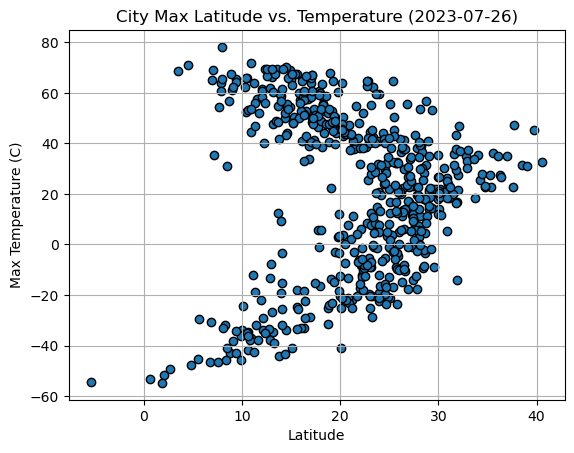

In [10]:
Max_Temp = city_data_df['Max Temp']
Lat = city_data_df['Lat']
plt.scatter(Max_Temp,Lat,edgecolor="black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-07-26)")
plt.savefig("Fig1.png")
plt.show()

#### Latitude Vs. Humidity

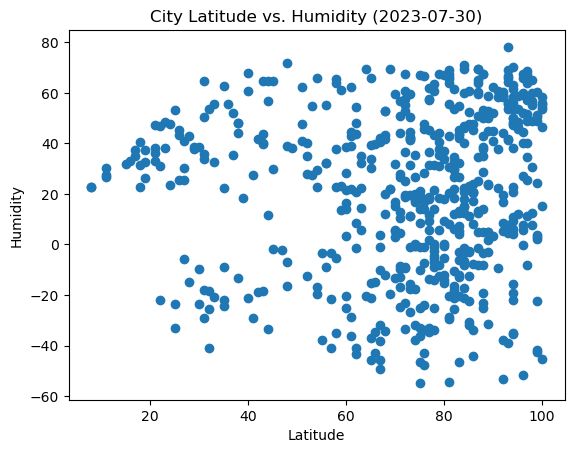

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. humidity
Humidity = city_data_df['Humidity']
Lat = city_data_df['Lat']
plt.scatter(Humidity,Lat)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2023-07-30)")
#plt.savefig("Fig2.png")
plt.show()

# Incorporate the other graph properties?
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

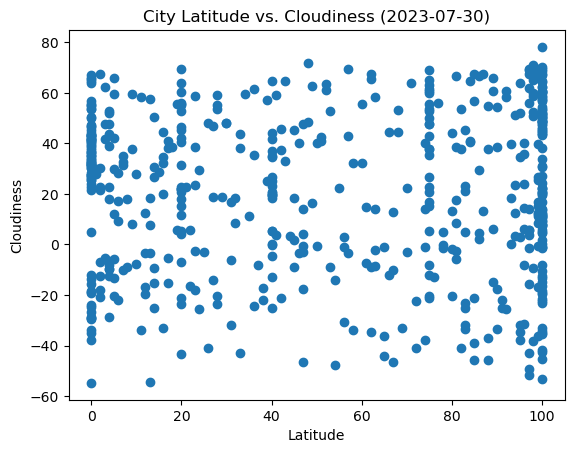

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. cloudiness
Cloudiness = city_data_df['Cloudiness']
Lat = city_data_df['Lat']
plt.scatter(Cloudiness,Lat)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2023-07-30)")
#plt.savefig("Fig3.png")
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

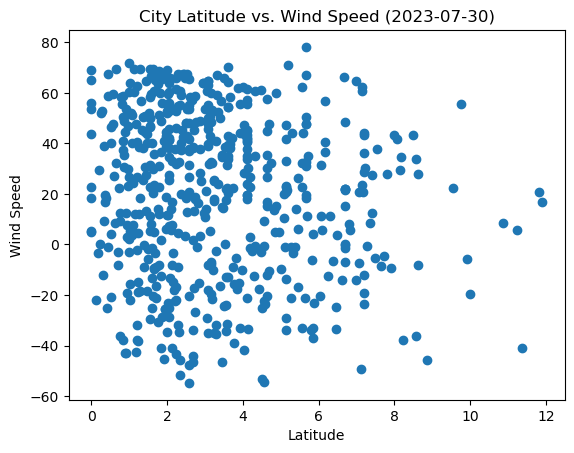

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
Lat = city_data_df['Lat']
plt.scatter(wind_speed,Lat)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2023-07-30)")
plt.savefig("Fig4.png")
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear(y_values,x_values,title,coords,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"the r value is: {rvalue**2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df=city_data_df[city_data_df['Lat']>=0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yeraliyev,43.2000,51.6500,27.56,26,0,8.50,KZ,1691972733
1,shingu,33.7333,135.9833,27.08,80,100,8.57,JP,1691972733
2,ribeira grande,38.5167,-28.7000,22.65,88,18,2.68,PT,1691972733
5,jinka,5.6500,36.6500,17.77,63,19,2.11,ET,1691972734
7,djenne,13.9061,-4.5533,27.45,75,74,3.02,ML,1691972735


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bredasdorp,-34.5322,20.0403,10.55,77,95,2.31,ZA,1691972734
4,edinburgh of the seven seas,-37.0676,-12.3116,10.87,65,88,5.85,SH,1691972734
6,port mathurin,-19.6833,63.4167,22.92,69,12,10.01,MU,1691972735
9,papao,-17.7500,-149.5500,27.82,73,47,4.42,PF,1691972735
10,waitangi,-43.9535,-176.5597,13.79,86,65,2.68,NZ,1691972736


###  Temperature vs. Latitude Linear Regression Plot

the r value is: 0.40031524735316243


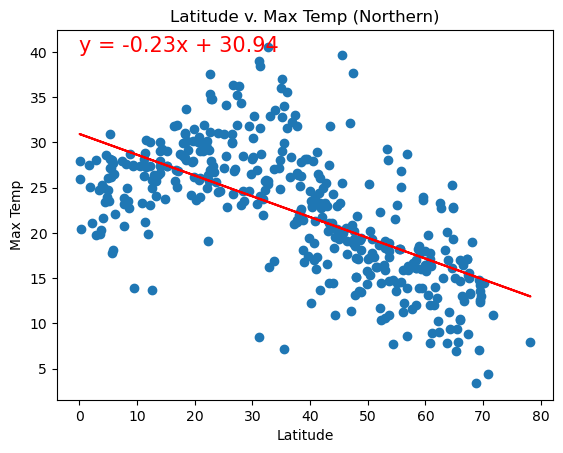

In [17]:
# Linear regression on Northern Hemisphere
linear(northern_hemi_df["Max Temp"],northern_hemi_df["Lat"],"Latitude v. Max Temp (Northern)",(0,40),"Latitude",
"Max Temp")

the r value is: 0.6596097740482905


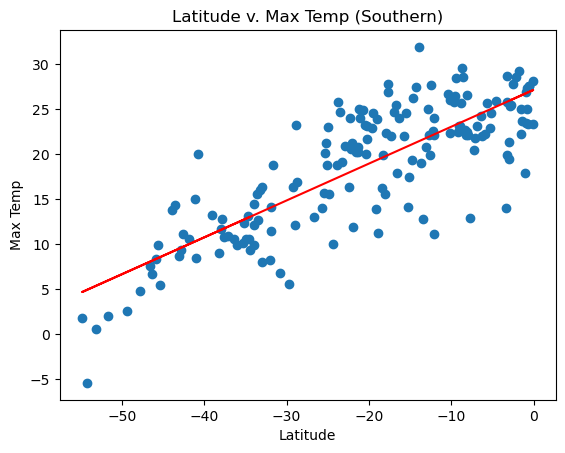

In [18]:
linear(southern_hemi_df["Max Temp"],southern_hemi_df["Lat"],"Latitude v. Max Temp (Southern)", (-30,40),"Latitude",
"Max Temp")

**Discussion about the linear relationship:There is a clear linear relationship

### Humidity vs. Latitude Linear Regression Plot

the r value is: 0.0005438872784796983


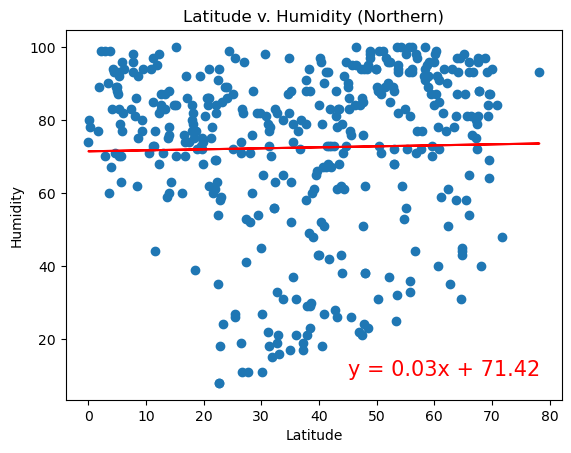

In [19]:
# Northern Hemisphere
linear(northern_hemi_df["Humidity"],northern_hemi_df["Lat"],"Latitude v. Humidity (Northern)", (45,10),"Latitude",
"Humidity")

the r value is: 0.6596097740482905


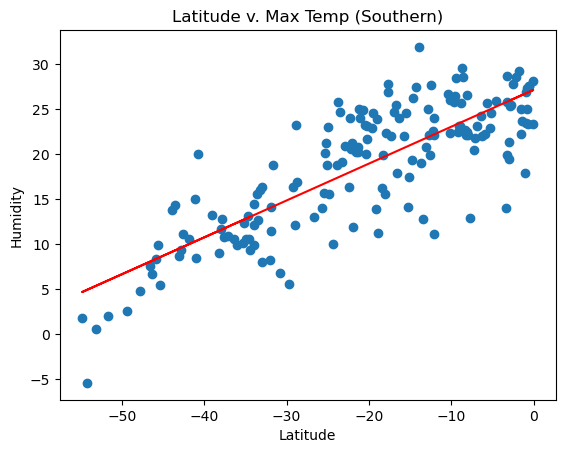

In [20]:
# Southern Hemisphere
linear(southern_hemi_df["Max Temp"],southern_hemi_df["Lat"],"Latitude v. Max Temp (Southern)", (-30,40),"Latitude",
"Humidity")

**Discussion about the linear relationship: There is a clear linear relationship

### Cloudiness vs. Latitude Linear Regression Plot

the r value is: 0.000842415528409288


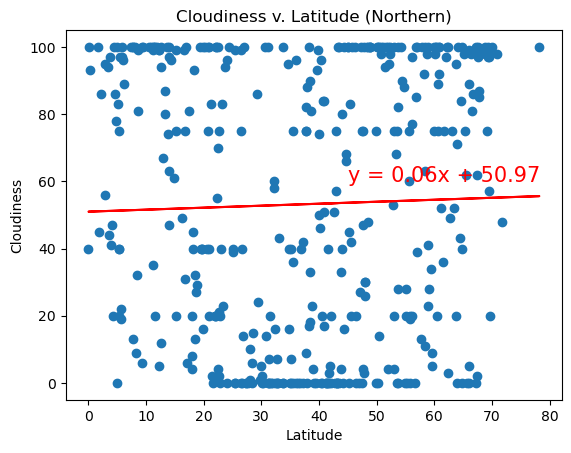

In [21]:
# Northern Hemisphere
linear(northern_hemi_df["Cloudiness"],northern_hemi_df["Lat"],"Cloudiness v. Latitude (Northern)",(45,60),"Latitude",
"Cloudiness")

the r value is: 0.016923981786188622


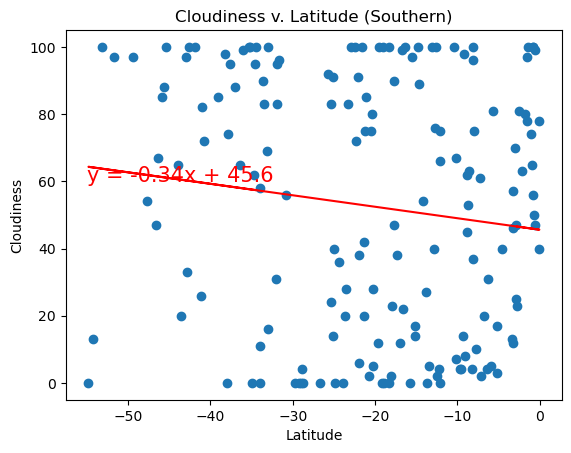

In [22]:
# Southern Hemisphere
linear(southern_hemi_df["Cloudiness"],southern_hemi_df["Lat"],"Cloudiness v. Latitude (Southern)",(-55,60),"Latitude",
"Cloudiness")

**Discussion about the linear relationship:There is no linear relationship

### Wind Speed vs. Latitude Linear Regression Plot

the r value is: 0.02338874437331932


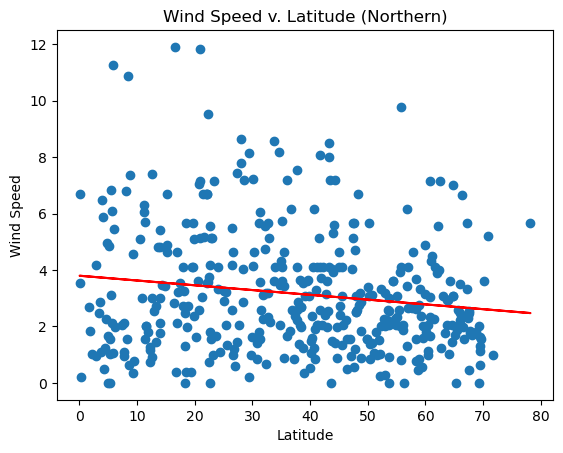

In [23]:
# Northern Hemisphere
linear(northern_hemi_df["Wind Speed"],northern_hemi_df["Lat"],"Wind Speed v. Latitude (Northern)",(-55,60),"Latitude",
"Wind Speed")

the r value is: 0.0037389895881053967


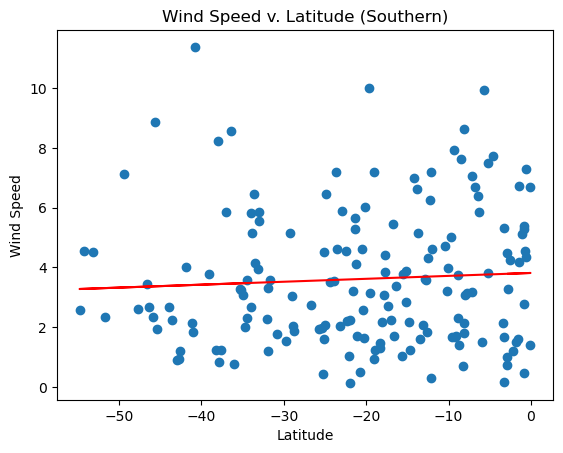

In [24]:
# Southern Hemisphere
linear(southern_hemi_df["Wind Speed"],southern_hemi_df["Lat"],"Wind Speed v. Latitude (Southern)",(-55,60),"Latitude",
"Wind Speed")

**Discussion about the linear relationship:** There is very little linear regression in the Southern hemisphere, more in the Northern hemisphere.